In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install langdetect

In [ ]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/isabellabrandes/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Authentication
consumerKey = "w4PKkF3EnmEmag2kK1DITt2MJ"
consumerSecret = "H3C8YSzkv76uDqgMvaEXIjRLm76aRmNNes3j6Y0PqlwG1MqGlw"
accessToken = "1388570510-XETt1eH8BOhbvOzmOiiG35vNyQ2t4A3pRvE8fXO"
accessTokenSecret = "L5JWaB2McgkCVlyZEc27nmU28YhM7CH46a2nOOT1wa5vL"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)


In [ ]:
#Sentiment Analysis
def percentage(part,whole):
     return 100 * float(part)/float(whole)

In [ ]:
!minet tw scrape --help

usage: minet twitter scrape [-h] [--rcfile RCFILE] [--include-refs] [-l LIMIT]
                            [-o OUTPUT] [--query-template QUERY_TEMPLATE]
                            [-s SELECT]
                            {tweets,users} query [file]

Minet Twitter Scrape Command

Scrape Twitter's public facing search API to collect tweets or users.

Be sure to check Twitter's advanced search to check what kind of
operators you can use to tune your queries (time range, hashtags,
mentions, boolean etc.):
https://twitter.com/search-advanced?f=live

Useful operators include "since" and "until" to search specific
time ranges like so: "since:2014-01-01 until:2017-12-31".

positional arguments:
  {tweets,users}                   What to scrape. Currently only `tweets` and `users` are possible.
  query                            Search query or name of the column containing queries to run in given CSV file.
  file                             Optional CSV file containing the queries to be run.



In [ ]:
!minet tw scrape tweets "abortion ireland min_retweets:5 until:2019-01-20 since:2018-12-21 -filter:replies" > after_5.csv


Searching for "abortion ireland min_retweets:5 until:2019-01-20 since:2018-12-21 -filter:replies"


In [ ]:
!minet tw scrape tweets "abortion ireland min_retweets:1 until:2019-01-20 since:2018-12-21 -filter:replies" > after_1.csv


Searching for "abortion ireland min_retweets:1 until:2019-01-20 since:2018-12-21 -filter:replies"


In [ ]:
!minet tw scrape tweets "abortion ireland until:2019-01-20 since:2018-12-21 -filter:replies" > after_0.csv


Searching for "abortion ireland until:2019-01-20 since:2018-12-21 -filter:replies"


In [ ]:
import pandas as pd
after_df = pd.read_csv('after_0.csv')


In [ ]:
tweets = after_df.text

In [ ]:
tweets[0]

"Incredible what a bunch of feminists can achieve in less than 6 years. Even 2 years ago no one imagined we'd have free, safe, legal abortion in Ireland by 2019. We're powerful.✊ « Bubblenoma: ARC is 6 years old today https://twitter.com/freesafelegal/status/954291730114842624 — https://twitter.com/Bubblenoma/status/1086755445191180288 »"

In [ ]:
topusers=after_df.user_name.value_counts()[:20].index


In [ ]:
nb_tweets_per_user=after_df.user_name.value_counts()[:20].to_dict()


In [ ]:
after_df['user_nb_tweets']=after_df['user_name'].map(nb_tweets_per_user)

In [ ]:
[x for x in after_df.columns if 'user' in x[:4]]

['user_screen_name',
 'user_location',
 'user_id',
 'user_name',
 'user_verified',
 'user_description',
 'user_url',
 'user_image',
 'user_tweets',
 'user_followers',
 'user_friends',
 'user_likes',
 'user_lists',
 'user_created_at',
 'user_timestamp_utc',
 'user_nb_tweets']

In [ ]:
top20_users_meta=after_df[after_df['user_name'].isin(topusers)].drop_duplicates(subset='user_name')[[x for x in after_df.columns if 'user' in x[:4]]]

In [ ]:
top20_users_meta.sort_values(by='user_nb_tweets',ascending=False)

,user_screen_name,user_location,user_id,user_name,user_verified,user_description,user_url,user_image,user_tweets,user_followers,user_friends,user_likes,user_lists,user_created_at,user_timestamp_utc,user_nb_tweets
1882,18_a_Day,Ireland,996894663809396736,18aDay,0,"January 1980 to December 2016, at least 170,21...",http://www.togetherforyes.ie,https://pbs.twimg.com/profile_images/996903151...,4134,44,153,79,0,2018-05-16T23:26:24,1526513184,198.0
7,ROINewsNow,NaN,4222277297,ROINewsNow,0,NaN,NaN,https://pbs.twimg.com/profile_images/711249193...,110393,394,406,8,132,2015-11-19T00:33:21,1447893201,68.0
1,RockofLifeNI,Northern Ireland,186588342,ᵁⁿᵇᵒʳⁿ ᴸⁱᵛᵉˢ ᴹᵃᵗᵗᵉʳ,0,ɪ'ʟʟ ʜᴀᴠᴇ ᴀ ʟᴏᴛ ᴏꜰ ᴇxᴘʟᴀɪɴɪɴɢ ᴛᴏ ᴅᴏ ᴏɴ ᴊᴜᴅɢᴇᴍᴇ...,NaN,https://pbs.twimg.com/profile_images/150459414...,37159,3763,4964,41401,22,2010-09-03T21:26:59,1283549219,47.0
20,freesafelegal,Ireland,1096875997,Abortion Rights IE,1,We are an all volunteer group of grassroots ac...,http://www.abortionrightscampaign.ie,https://pbs.twimg.com/profile_images/141596793...,45790,26314,4966,18139,221,2013-01-17T01:39:13,1358386753,24.0
290,LifeNewsHQ,USA,50434933,LifeNews.com,0,https://t.co/0D2kd9rG5j is a pro-life news out...,http://www.LifeNews.com,https://pbs.twimg.com/profile_images/223774405...,225251,236955,216984,78941,2725,2009-06-24T20:52:42,1245876762,19.0
289,LifeNewsToo,USA,74552263,Stop Abortion Now,0,Project of LifeNews the #1 pro-life web site. ...,http://www.LifeNews.com,https://pbs.twimg.com/profile_images/150566505...,141244,38479,36140,492,436,2009-09-15T20:51:51,1253047911,16.0
187,All4Choice,"Belfast, Northern Ireland",3364484080,Alliance For Choice,0,A4C campaign for free safe legal abortion in I...,https://everpress.com/shado-free-safe-legal-local,https://pbs.twimg.com/profile_images/105505396...,26233,13785,3295,17731,72,2015-07-07T16:53:50,1436288030,14.0
360,Dhammikax,London,2620769102,Dr. D,0,#Science #Evidence #PublicHealth & #Choice...,https://www.msichoices.org/,https://pbs.twimg.com/profile_images/140663680...,17011,4709,1238,9920,186,2014-07-12T06:38:17,1405147097,13.0
286,StevenErtelt,USA,254777469,Steven Ertelt,0,Founder and Editor of https://t.co/vMByGKehw4 ...,http://www.LifeNews.com,https://pbs.twimg.com/profile_images/108158480...,112843,35511,26126,1043,451,2011-02-20T00:22:13,1298161333,12.0
1928,LiveActionNews,United States,40623989,Live Action News,0,The Reporting Arm of @LiveAction Covering Pro-...,http://LiveActionNews.org,https://pbs.twimg.com/profile_images/122808272...,53584,30745,5282,397,340,2009-05-17T07:19:19,1242544759,9.0


In [ ]:
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
noOfTweet=len(tweets)
for tweet in tweets:
 
    #print(tweet.text)
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(tweet)
        negative += 1

    elif pos > neg:
         positive_list.append(tweet)
         positive += 1
 
    elif pos == neg:
         neutral_list.append(tweet)
         neutral += 1

positive = percentage(positive, noOfTweet)#
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)

tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2561
positive number:  1340
negative number:  857
neutral number:  364


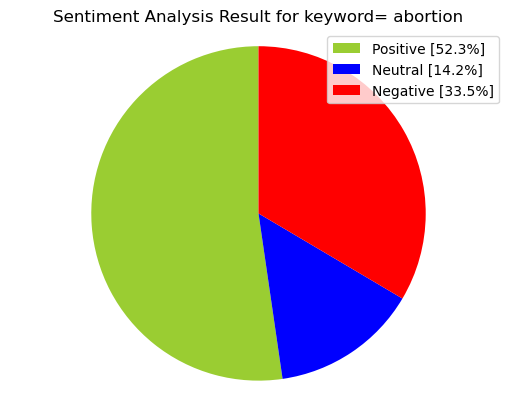

In [ ]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+'abortion'+"" )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list

In [ ]:
tweet_list.drop_duplicates(inplace = True)

In [ ]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
     score = SentimentIntensityAnalyzer().polarity_scores(row)
     neg = score['neg']
     neu = score['neu']
     pos = score['pos']
     comp = score['compound']
     if neg > pos:

        tw_list.loc[index, 'sentiment'] = "negative"
     elif pos > neg:
         tw_list.loc[index, 'sentiment'] = "positive"
     else:
         tw_list.loc[index, 'sentiment'] = "neutral"
     tw_list.loc[index, 'neg'] = neg
     tw_list.loc[index, 'neu'] = neu
     tw_list.loc[index, 'pos'] = pos
     tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,If I ever visit Northern Ireland the first thing I'm going to do is pray in public for the end of abortion and if y… https://t.co/T7IxqQLgSD,If I ever visit Northern Ireland the first thing I'm going to do is pray in public for the end of abortion and if y… https://t.co/T7IxqQLgSD,0.125000,0.200000,positive,0.000,0.913,0.087,0.3182
1,RT @Paul71: On a day when thousands of people gathered in Ireland and all over the world to pray for peace and to join in the Consecration…,RT @Paul71: On a day when thousands of people gathered in Ireland and all over the world to pray for peace and to join in the Consecration…,0.000000,0.000000,positive,0.000,0.742,0.258,0.7906
2,"RT @shannonrmp: BIG day for IRELAND 🥳 the North has passed bills for free Period products, the Safe leave bill for DV survivors AND safe ac…","RT @shannonrmp: BIG day for IRELAND 🥳 the North has passed bills for free Period products, the Safe leave bill for DV survivors AND safe ac…",0.350000,0.475000,positive,0.038,0.671,0.291,0.8360
3,Abortion is legal in both South and North Ireland 🇮🇪 It’s just the Unionists who want to remove civil rights and co… https://t.co/jDiR0u8IDA,Abortion is legal in both South and North Ireland 🇮🇪 It’s just the Unionists who want to remove civil rights and co… https://t.co/jDiR0u8IDA,0.200000,0.200000,positive,0.000,0.882,0.118,0.2023
4,"RT @griptmedia: “In reality, with nobody there to show they care, these zones will make a lonely walk to the abortion clinic even more lone…","RT @griptmedia: “In reality, with nobody there to show they care, these zones will make a lonely walk to the abortion clinic even more lone…",0.200000,0.600000,positive,0.090,0.794,0.116,0.1779
5,RT @NWCI: Do you care about #abortionaccess in Ireland? Then make a submission to the #abortionreview today \n\nThis is a powerful way for yo…,RT @NWCI: Do you care about #abortionaccess in Ireland? Then make a submission to the #abortionreview today \n\nThis is a powerful way for yo…,0.300000,1.000000,positive,0.000,0.769,0.231,0.7184
6,"RT @RockofLifeNI: SDLP MLAs, Matthew O'Toole, Pat Catney and \nSinéad McLaughlin all\nvoted AGAINST protecting babies with Down Syndrome, Cle…","RT @RockofLifeNI: SDLP MLAs, Matthew O'Toole, Pat Catney and \nSinéad McLaughlin all\nvoted AGAINST protecting babies with Down Syndrome, Cle…",-0.155556,0.288889,neutral,0.000,1.000,0.000,0.0000
10,RT @Ciara87C: The north of ireland still doesn’t have abortion access but my mentions are full of men telling me they’re looking out for wo…,RT @Ciara87C: The north of ireland still doesn’t have abortion access but my mentions are full of men telling me they’re looking out for wo…,0.350000,0.550000,neutral,0.000,1.000,0.000,0.0000
13,RT @APPGSRH: We strongly welcome the news that girls and women accessing abortion care in Northern Ireland will be protected from harassmen…,RT @APPGSRH: We strongly welcome the news that girls and women accessing abortion care in Northern Ireland will be protected from harassmen…,0.800000,0.900000,positive,0.000,0.616,0.384,0.8807
15,"RT @RockofLifeNI: @SDLPlive Will you tell constituents that, yesterday in Stormont, every SDLP MLA voted to criminalise these people?\n\nPray…","RT @RockofLifeNI: @SDLPlive Will you tell constituents that, yesterday in Stormont, every SDLP MLA voted to criminalise these people?\n\nPray…",0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]


In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,117,41.64
neutral,99,35.23
negative,65,23.13


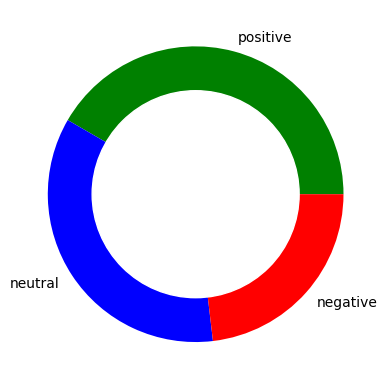

In [ ]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names = pc.index
size = pc["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import sys
from os import path
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("Abortion")
    stopwords.add("Ireland")
    wc = WordCloud(background_color="white",
    max_words=300,
    stopwords=stopwords,
    width = int(400),
    height = int(400),
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


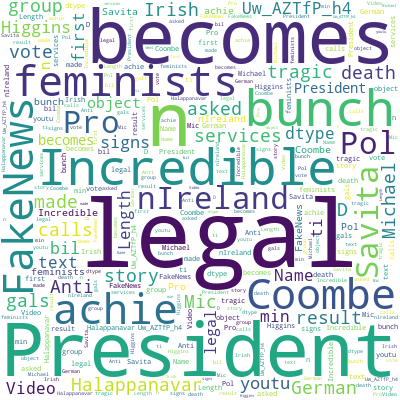

Wordcloud for all tweets


In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(tweets)

print("Wordcloud for all tweets")

In [ ]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)
print("Wordcloud for positive tweets")

NameError: name 'tw_list_positive' is not defined

Word Cloud Saved Successfully


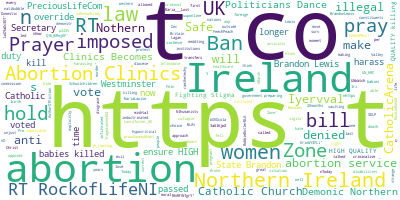

Wordcloud for negative tweets


In [ ]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)
print("Wordcloud for negative tweets")

In [ ]:
#Calculating tweet’s length and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,134.12
neutral,119.54
positive,136.35


In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,18.94
neutral,15.41
positive,19.56


In [ ]:
#Removing Punctuation
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,If I ever visit Northern Ireland the first thing I'm going to do is pray in public for the end of abortion and if y… https://t.co/T7IxqQLgSD,If I ever visit Northern Ireland the first thing I'm going to do is pray in public for the end of abortion and if y… https://t.co/T7IxqQLgSD,0.125,0.200,positive,0.000,0.913,0.087,0.3182,140,26,If I ever visit Northern Ireland the first thing Im going to do is pray in public for the end of abortion and if y… httpstcoT7IxqQLgSD,"[if, i, ever, visit, northern, ireland, the, first, thing, im, going, to, do, is, pray, in, public, for, the, end, of, abortion, and, if, y, httpstcot7ixqqlgsd]","[ever, visit, northern, ireland, first, thing, im, going, pray, public, end, abortion, httpstcot7ixqqlgsd]","[ever, visit, northern, ireland, first, thing, im, go, pray, public, end, abort, httpstcot7ixqqlgsd]"
1,RT @Paul71: On a day when thousands of people gathered in Ireland and all over the world to pray for peace and to join in the Consecration…,RT @Paul71: On a day when thousands of people gathered in Ireland and all over the world to pray for peace and to join in the Consecration…,0.000,0.000,positive,0.000,0.742,0.258,0.7906,139,27,RT Paul71 On a day when thousands of people gathered in Ireland and all over the world to pray for peace and to join in the Consecration…,"[rt, paul71, on, a, day, when, thousands, of, people, gathered, in, ireland, and, all, over, the, world, to, pray, for, peace, and, to, join, in, the, consecration, ]","[rt, paul71, day, thousands, people, gathered, ireland, world, pray, peace, join, consecration, ]","[rt, paul71, day, thousand, peopl, gather, ireland, world, pray, peac, join, consecr, ]"
2,"RT @shannonrmp: BIG day for IRELAND 🥳 the North has passed bills for free Period products, the Safe leave bill for DV survivors AND safe ac…","RT @shannonrmp: BIG day for IRELAND 🥳 the North has passed bills for free Period products, the Safe leave bill for DV survivors AND safe ac…",0.350,0.475,positive,0.038,0.671,0.291,0.8360,140,26,RT shannonrmp BIG day for IRELAND 🥳 the North has passed bills for free Period products the Safe leave bill for DV survivors AND safe ac…,"[rt, shannonrmp, big, day, for, ireland, the, north, has, passed, bills, for, free, period, products, the, safe, leave, bill, for, dv, survivors, and, safe, ac, ]","[rt, shannonrmp, big, day, ireland, north, passed, bills, free, period, products, safe, leave, bill, dv, survivors, safe, ac, ]","[rt, shannonrmp, big, day, ireland, north, pass, bill, free, period, product, safe, leav, bill, dv, survivor, safe, ac, ]"
3,Abortion is legal in both South and North Ireland 🇮🇪 It’s just the Unionists who want to remove civil rights and co… https://t.co/jDiR0u8IDA,Abortion is legal in both South and North Ireland 🇮🇪 It’s just the Unionists who want to remove civil rights and co… https://t.co/jDiR0u8IDA,0.200,0.200,positive,0.000,0.882,0.118,0.2023,140,23,Abortion is legal in both South and North Ireland 🇮🇪 It’s just the Unionists who want to remove civil rights and co… httpstcojDiRu8IDA,"[abortion, is, legal, in, both, south, and, north, ireland, it, s, just, the, unionists, who, want, to, remove, civil, rights, and, co, httpstcojdiru8ida]","[abortion, legal, south, north, ireland, unionists, want, remove, civil, rights, co, httpstcojdiru8ida]","[abort, legal, south, north, ireland, unionist, want, remov, civil, right, co, httpstcojdiru8ida]"
4,"RT @griptmedia: “In reality, with nobody there to show they care, these zones will make a lonely walk to the abortion clinic even more lone…","RT @griptmedia: “In reality, with nobody there to show they care, these zones will make a lonely walk to the abortion clinic even more lone…",0.200,0.600,positive,0.090,0.794,0.116,0.1779,140,25,RT griptmedia “In reality with nobody there to show they care these zones will make a lonely walk to the abortion clinic even mor

In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

281 Number of reviews has 1070 words


,,ab,abet,abl,abo,abolish,abor,abort,aborti,abortio,...,ye,year,yesterday,yet,yo,youd,your,zackbeauchamp,zon,zone
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11].style.background_gradient(cmap='Blues')


,0
abort,183
northern,144
,85
rt,84
servic,81
uk,76
govern,68
prepar,49
overrid,47
law,28


In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams

[('northern ireland', 138),
 ('abortion services', 74),
 ('uk government', 60),
 ('ireland abortion', 46),
 ('override northern', 45),
 ('government preparing', 42),
 ('preparing override', 41),
 ('services https', 28),
 ('services northern', 26),
 ('ireland https', 19),
 ('rt rockoflifeni', 13),
 ('abortion https', 11),
 ('intervene directly', 11),
 ('abortion clinics', 10),
 ('pro life', 9),
 ('ensure availability', 9),
 ('availability abortion', 9),
 ('services available', 9),
 ('directly ensure', 8),
 ('ensure abortion', 8)]

In [ ]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('override northern ireland', 45),
 ('northern ireland abortion', 43),
 ('uk government preparing', 42),
 ('government preparing override', 41),
 ('preparing override northern', 41),
 ('ireland abortion services', 40),
 ('abortion services https', 28),
 ('abortion services northern', 26),
 ('services northern ireland', 25),
 ('northern ireland https', 19),
 ('availability abortion services', 9),
 ('abortion services available', 9),
 ('ensure availability abortion', 8),
 ('intervene directly ensure', 8),
 ('directly ensure abortion', 8),
 ('ensure abortion services', 8),
 ('ireland politicians dance', 6),
 ('uk government intervene', 6),
 ('government intervene directly', 6),
 ('commission abortion services', 6)]